The mean squared error (MSE) on test set: 3041.0505


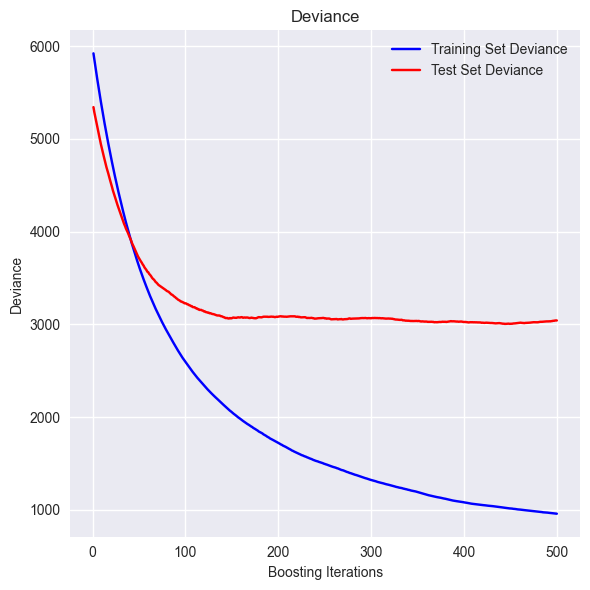

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap6\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入数据集工具
from sklearn.datasets import load_diabetes
# 导入集成模型
from sklearn.ensemble import GradientBoostingRegressor
# 导入均方误差工具
from sklearn.metrics import mean_squared_error
# 导入数据集划分工具
from sklearn.model_selection import train_test_split
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 加载数据集
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)
# 设置一些参数
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
# 构建模型
reg = GradientBoostingRegressor(**params)
# 模型拟合
reg.fit(X_train, y_train)
# 预测
y_pred = reg.predict(X_test)
# 均方误差
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# 初始化测试集上的mse
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
# 阶段性预测X_test
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    # 得到回归的mse
    test_score[i] = mean_squared_error(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6), tight_layout=True)
ax.set_title("Deviance")
ax.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
ax.plot(
    np.arange(params["n_estimators"]) + 1, 
    test_score, "r-", label="Test Set Deviance"
)
ax.legend(loc="upper right")
ax.set_xlabel("Boosting Iterations")
ax.set_ylabel("Deviance")
plt.show()
fig.savefig("../codeimage/code3.pdf")
